## ARMA Models

In [3]:
import time 
import warnings 

import matplotlib.pyplot as plt 
import pandas as pd
import plotly.express as px
import seaborn as sns 
from pymongo import  MongoClient
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import  plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA 

#### Prepare Data

In [ ]:
client = MongoClient(host="localhost", port = 27017)
db = client["air-quality"]
nairobi = db["nairobi"]

In [ ]:
def wrangle(collection, resample_rule="1H"):

    results = collection.find(
        {"metadata.site": 29, "metadata.measurement": "P2"},
        projection={"P2": 1, "timestamp": 1, "_id": 0},
    )

    # Read results into DataFrame
    df = pd.DataFrame(list(results)).set_index("timestamp")

    # Localize timezone
    df.index = df.index.tz_localize("UTC").tz_convert("Africa/Nairobi")

    # Remove outliers
    df = df[df["P2"] < 500]

    # Resample and forward-fill
    y = df["P2"].resample(resample_rule).mean().fillna(method="ffill")

    return y

In [21]:
df = pd.read_csv("data/nairobi-city-air-quality.csv").set_index("timestamp")
df.dropna(inplace=True)
df = df[df["P2"] < 500]
y = df["P2"]
y

timestamp
09/01/2018 00:00       34.43
09/01/2018 00:05       30.53
09/01/2018 00:10       22.80
09/01/2018 00:15       13.30
09/01/2018 00:20       16.57
                       ...  
12/31/2018 23:35:06    21.92
12/31/2018 23:40:06    20.83
12/31/2018 23:45:05    19.12
12/31/2018 23:50:05    19.10
12/31/2018 23:55:05    17.60
Name: P2, Length: 32906, dtype: float64

#### Explore

ACF plot

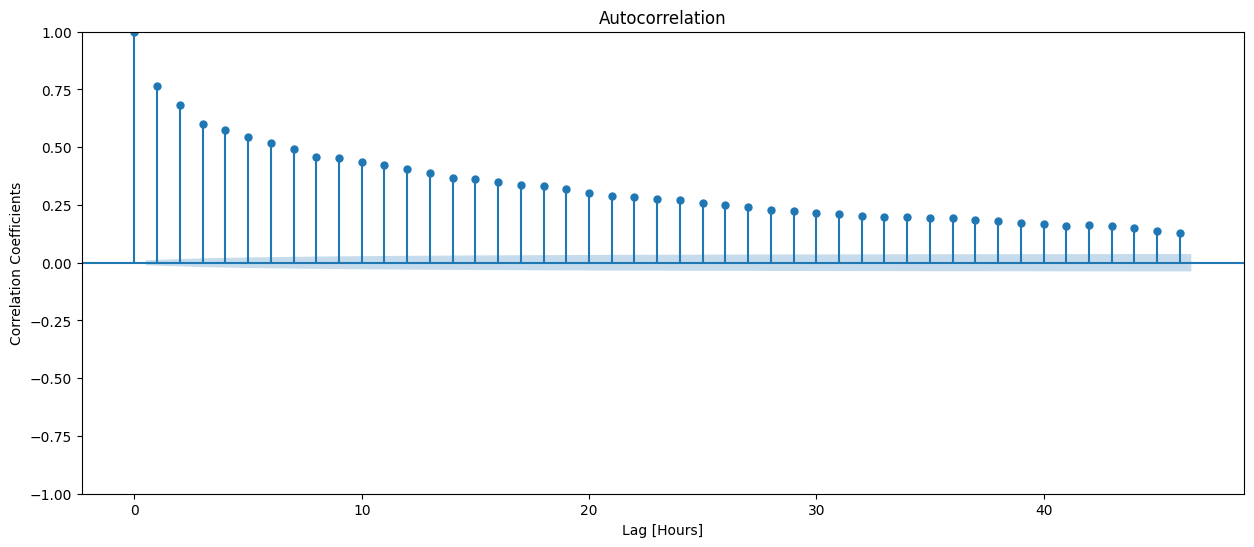

In [22]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y, ax=ax)
plt.xlabel("Lag [Hours]")
plt.ylabel("Correlation Coefficients");